In [2]:
df<-read.csv('d:/data/titanic/train3.csv')
head(df)

Survived,Pclass,pclass1,plclass2,plcass3,Sex,male,female,Age,SibSp,Parch,Fare
0,3,0,0,1,male,1,0,22,1,0,7.2500
1,1,1,0,0,female,0,1,38,1,0,71.2833
1,3,0,0,1,female,0,1,26,0,0,7.9250
1,1,1,0,0,female,0,1,35,1,0,53.1000
0,3,0,0,1,male,1,0,35,0,0,8.0500
0,3,0,0,1,male,1,0,30,0,0,8.4583


In [3]:
library(dplyr)
df<-df %>% select(-Pclass,-Sex) #분석에 사용하지 않는 필드 제외
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 891  10

Survived,pclass1,plclass2,plcass3,male,female,Age,SibSp,Parch,Fare
0,0,0,1,1,0,22,1,0,7.2500
1,1,0,0,0,1,38,1,0,71.2833
1,0,0,1,0,1,26,0,0,7.9250
1,1,0,0,0,1,35,1,0,53.1000
0,0,0,1,1,0,35,0,0,8.0500
0,0,0,1,1,0,30,0,0,8.4583


In [4]:
#(corrmatrix <- cor(df))

In [5]:
#library(corrplot)
#corrplot(cor(df),method='circle')


  0   1 
549 342 

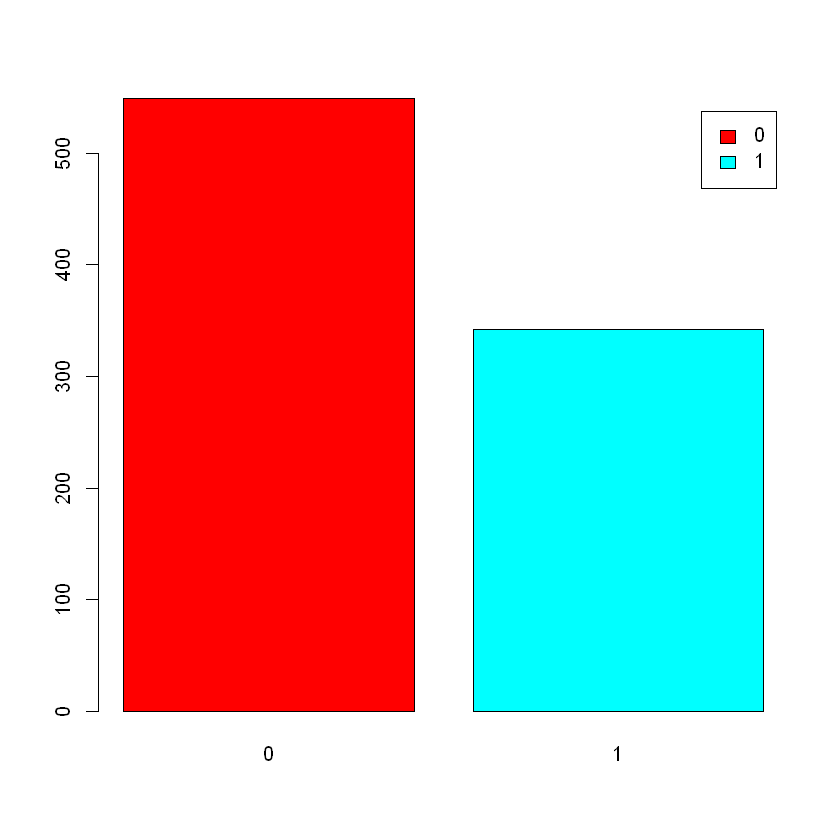

In [6]:
(tbl<-table(df$Survived))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [7]:
library(ROSE)
df_samp<-ovun.sample(Survived ~. , data=df, seed=1,
                    method='under',N=342*2)$data
(tbl<-table(df_samp$Survived))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




  0   1 
342 342 

In [8]:
library(caret)
set.seed(123)
#학습용:검증용 8:2
idx_train<-createDataPartition(y=df_samp$Survived, p=0.8, list=F)
train <-df_samp[idx_train,]
X_train <- train[,-1]
y_train<-train[,1]
test<-df_samp[-idx_train,]
X_test<-test[,-1]
y_test<-test[,1]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [9]:
library(party)
model <- ctree(Survived ~ . , data=train)
model

Warning message:
"package 'party' was built under R version 3.6.2"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.2"


	 Conditional inference tree with 7 terminal nodes

Response:  Survived 
Inputs:  pclass1, plclass2, plcass3, male, female, Age, SibSp, Parch, Fare 
Number of observations:  548 

1) male <= 0; criterion = 1, statistic = 152.851
  2) plcass3 <= 0; criterion = 1, statistic = 34.768
    3)*  weights = 132 
  2) plcass3 > 0
    4) Fare <= 23.25; criterion = 0.994, statistic = 11.541
      5)*  weights = 76 
    4) Fare > 23.25
      6)*  weights = 12 
1) male > 0
  7) pclass1 <= 0; criterion = 1, statistic = 16.523
    8) Age <= 12; criterion = 1, statistic = 21.691
      9) SibSp <= 1; criterion = 1, statistic = 18.362
        10)*  weights = 15 
      9) SibSp > 1
        11)*  weights = 7 
    8) Age > 12
      12)*  weights = 220 
  7) pclass1 > 0
    13)*  weights = 86 

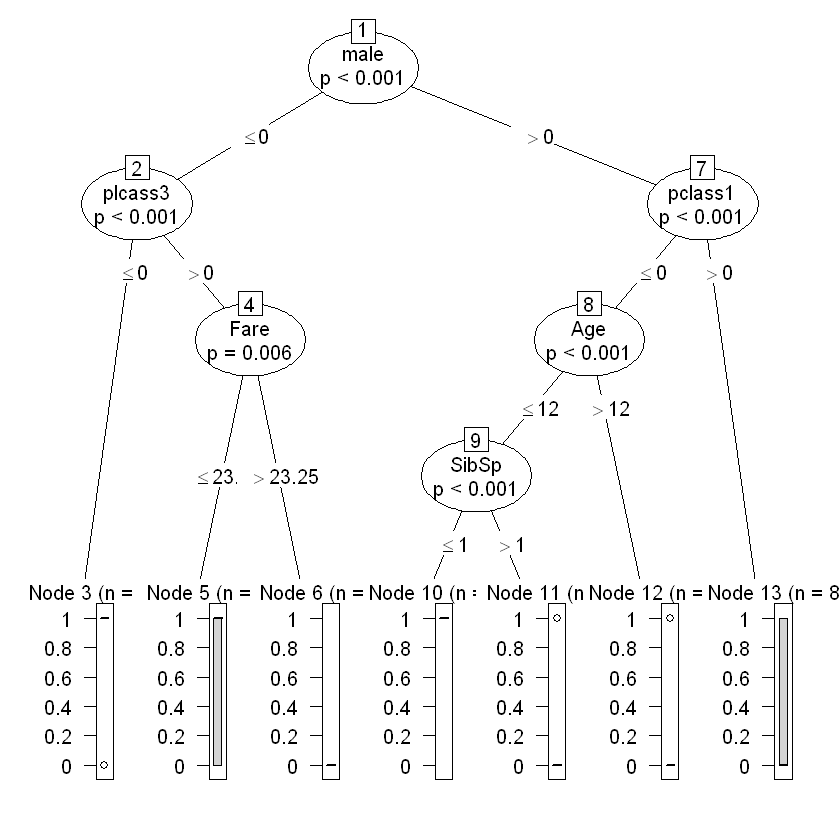

In [10]:
plot(model)

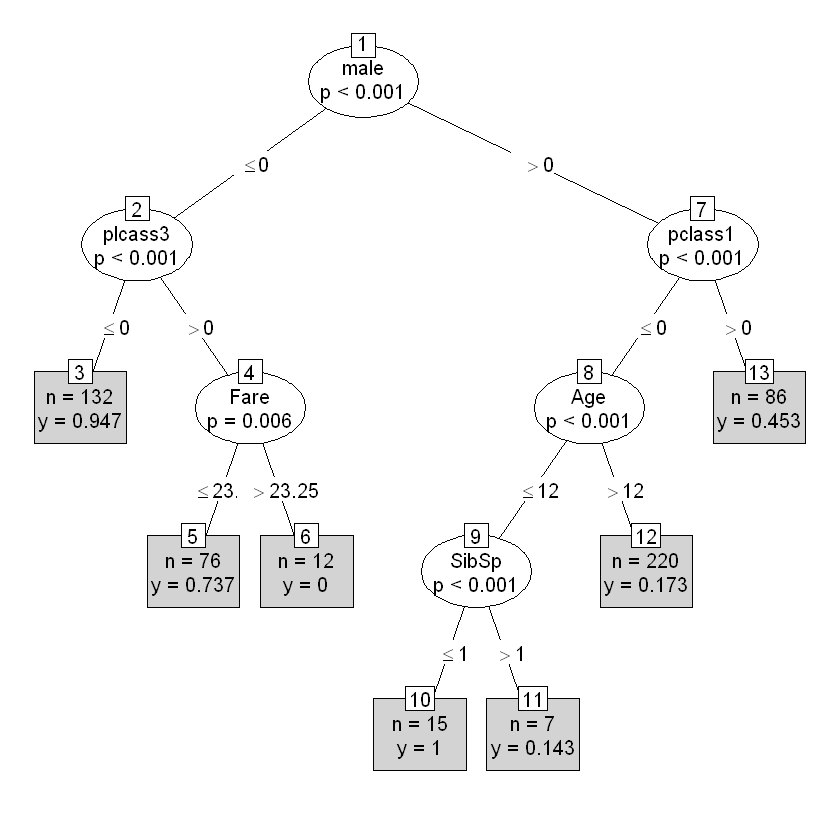

In [12]:
plot(model,type='simple')
#여성 /1,2등석 ->94.7%
#여성 /3등석 / 요금 23이하 -> 73.7% 생존
#여성 /3등석 / 요금 23초과 -> 사망
#남성 /1등석 -> 43% 생존
#남성 /2,3등석 /12세 초과 -> 17%생존
#남성 / 2,3등석 /12세 이하 -> 17%생존
#남성 /2,3등석 /12세 이하 

In [47]:
#학습용 데이터셋의 예측 정확도 : 80.8%
pred<-predict(model, newdata=X_train, type='response')
result<-round(pred)
mean(y_train == result)
table(y_train, result)

[1] 0.8083942

       result
y_train   0   1
      0 247  27
      1  78 196

In [49]:
#검증용 데이터셋 예측 정확도:  83.3%
pred<-predict(model, newdata=X_test, type='response')
result<-round(pred)
mean(y_test == result)
table(y_test, result)

[1] 0.8382353

      result
y_test  0  1
     0 64  4
     1 18 50

In [51]:
library(randomForest)
set.seed(1)
model<-randomForest(Survived ~ . , data=train,
                   mtry=floor(sqrt(ncol(train))), ntree=100,
                   importance=T)
model

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = Survived ~ ., data = train, mtry = floor(sqrt(ncol(train))),      ntree = 100, importance = T) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 3

          Mean of squared residuals: 0.1398204
                    % Var explained: 44.07

In [52]:
#학습용 데이터셋의 예측 정확도 : 80.8%
pred<-predict(model, newdata=X_train, type='response')
result<-round(pred)
mean(y_train == result)
table(y_train, result)

[1] 0.8905109

       result
y_train   0   1
      0 250  24
      1  36 238

In [53]:
#검증용 데이터셋 예측 정확도:  83.3%
pred<-predict(model, newdata=X_test, type='response')
result<-round(pred)
mean(y_test == result)
table(y_test, result)

[1] 0.8308824

      result
y_test  0  1
     0 60  8
     1 15 53

In [54]:
importance(model) #변수의 정확도와 중요도

,%IncMSE,IncNodePurity
pclass1,6.551253,2.724934
plclass2,6.260059,1.296281
plcass3,9.525925,4.818527
male,8.695620,13.319235
female,13.232231,20.830229
Age,13.562405,17.648028
SibSp,7.084962,5.305426
Parch,6.577435,3.571427
Fare,13.831182,19.427403


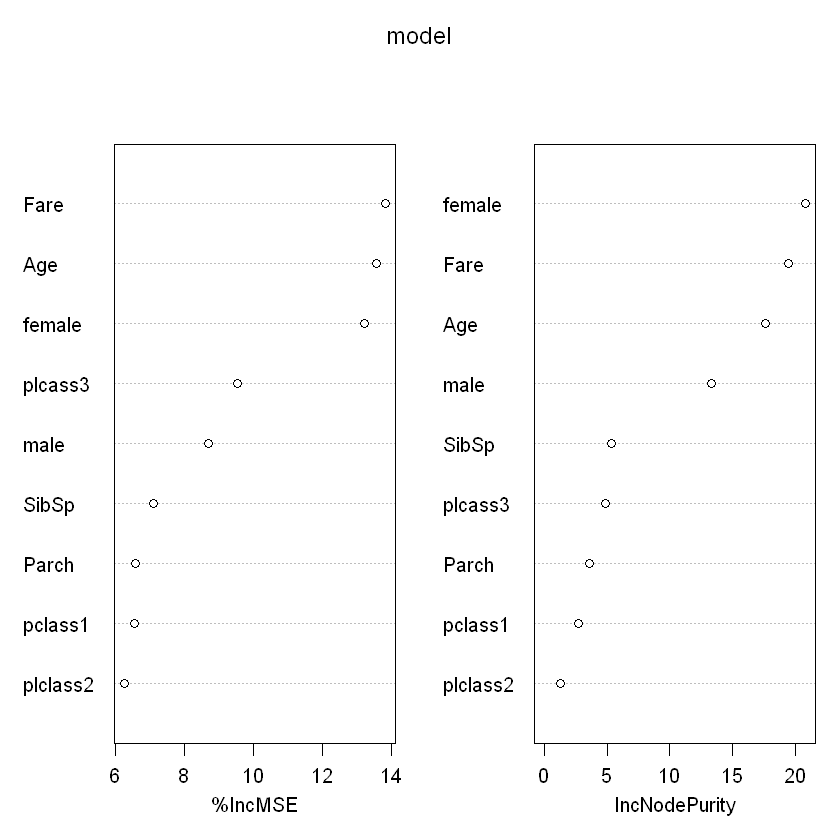

In [55]:
varImpPlot(model)